In [ ]:
import time

from simulator import *
from algorithms import *
from algorithms_2 import *
from MCTS import *

In [ ]:
lava_maze = """
-----------------
|..L....L....L..|
|..L..LLL..L.LL.|
|..L..L.......L.|
|.....L.....L...|
|..L....L....L..|
|..LLL..L.LLLL..|
|..L.L..L..L....|
|..L....L....L..|
|.....L.....L...|
-----------------
"""

simple_room = """
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............

"""

In [ ]:
map = make_map(map_str=lava_maze, n_apples=5, seed=18)
print(map)

In [ ]:
env = create_env(map, apple_reward=0.75, penalty_time=-0.1)
env.reset()
env.render()

In [ ]:
# A star with bonus to tiles that have apples nearby
simulate_with_heuristic(env, a_star_apple, h=manhattan_distance, apple_bonus=3)

In [ ]:
# A* with modified heuristic that considers the distance to apples then stairs
simulate_with_heuristic(env, a_star_collect_apples, weight=1)

In [ ]:
# Monte Carlo with Random
simulate_with_heuristic(
    env, mcts, iterations=50000
)

In [ ]:
# Monte Carlo Tree Search with heuristic
simulate_with_heuristic(
    env, mcts, iterations=50000, policy=heuristic_rollout_policy,
)

In [ ]:
# Beam Search
simulate_with_heuristic(
    env, beam_search_path_planner, apple_reward=7.5,
    beam_width=5
)

In [ ]:
# Potential fields
simulate_with_heuristic(
    env, potential_field_path
)

In [ ]:
simulate_with_heuristic(
    env, greedy_best_first_search
)

In [ ]:
from MCTS_2 import mcts

mcts = simulate_with_heuristic(env, mcts,
                               iterations=10000,
                               heuristic=None,  # Using cached BFS as heuristic
                               )

# Online Pathfinding Algorithms

In [1]:
from algorithms_online import *
from simulator import create_env, make_map, simulate_online
from simulator import *
from algorithms import greedy_best_first_search, potential_field_path

lava_maze = """
-----------------
|..L....L....L..|
|..L..LLL..L.LL.|
|..L..L.......L.|
|.....L.....L...|
|..L....L....L..|
|..LLL..L.LLLL..|
|..L.L..L..L....|
|..L....L....L..|
|.....L.....L...|
-----------------
"""

simple_room = """
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
"""

simple_maze = """
||||||||||||||||||||||
|....................|
|..|||||.....|..|....|
|..|   |...||||||||..|
|..||| |........|....|
|.....| |||||||.|||..|
|.....|       |.|....|
|.....|       |......|
|||||||  ||||||......|
         |.......|...|
         |.......|||.|
         |...........|
         |||||||||||||
"""

In [2]:
env = create_env(make_map(lava_maze, 5), apple_reward=0.75, penalty_time=-0.1)

Evaluating path...
Actions to take: ['UP', 'UP']
Apple collected in the path: 1
Expected Reward:  1.45
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                              -----------------                                
                              |..}...%}....}..|                                
                              |..}..}}}..}.}}%|                                
                              |..}.A}.......}.|                                
                              |....*}.%..%}...|                                
                              |..}.@..}...>}..|                                
                 

KeyboardInterrupt: 

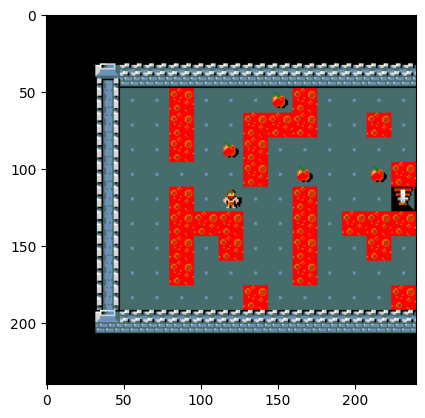

In [3]:
simulate_online(env, a_star_online)

In [4]:
env = create_env("simple_maze.des", apple_reward=1)

In [ ]:
simulate_online(env, montecarlo_online, wait_time=0.5, clear_outputs=True, cropped=True, iterations=10000,
                heuristic=cached_bfs)